In [1]:
import pandas as pd
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
macdonald_df = pd.read_csv('/content/drive/My Drive/McDonald_s_Reviews.csv', encoding='latin1')

In [6]:
macdonald_df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


# Data Preprocessing

In [10]:
# Mapping the 'rating' to sentiment labels (1-3 as "bad" -> 0, 4-5 as "best" -> 1)
def map_rating_to_sentiment(rating):
    if isinstance(rating, str) and 'star' in rating.lower():
        stars = int(rating.split()[0])
        return 1 if stars > 3 else 0
    return np.nan

macdonald_df['sentiment'] = macdonald_df['rating'].apply(map_rating_to_sentiment)
macdonald_df.dropna(subset=['sentiment'], inplace=True)

In [11]:
macdonald_df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,sentiment
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,0
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,1
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,0
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,1
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,0
...,...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star,0
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars,1
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars,1
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars,1


In [13]:
import re

# Function to preprocess review text: lowercase, remove short words, punctuation, numbers
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply text preprocessing to the 'review' column
macdonald_df['cleaned_text'] = macdonald_df['review'].apply(preprocess_text)

In [15]:
macdonald_df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,sentiment,cleaned_text
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,0,why does look like someone spit food had norma...
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,1,mcdonalds what far the food and atmosphere t...
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,0,made mobile order got the speaker and checked ...
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,1,crispy chicken sandwich was customer servic...
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,0,repeat order times the drive thru and she sti...


In [16]:
# Step 3: Stop Word Removal and Lemmatization
import nltk
from nltk.corpus import stopwords
import spacy

# Download stop words if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load spaCy English language model
nlp = spacy.load('en_core_web_sm')

# Define function to remove stop words and apply lemmatization
def remove_stopwords_and_lemmatize(text):
    doc = nlp(text)
    lemmatized = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
    return ' '.join(lemmatized)

# Apply function to 'cleaned_text' column
macdonald_df['cleaned_text'] = macdonald_df['cleaned_text'].apply(remove_stopwords_and_lemmatize)

# Display the processed dataset
macdonald_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,sentiment,cleaned_text
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,0,look like someone spit food normal transaction...
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,1,mcdonald far food atmosphere staff make di...
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,0,make mobile order get speaker check line mov...
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,1,crispy chicken sandwich customer service ...
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,0,repeat order time drive thru still manage me...


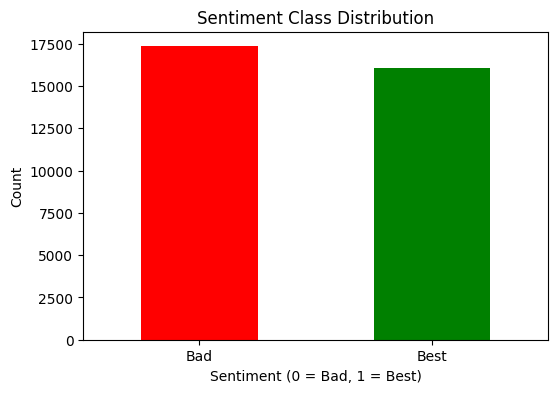

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Class Distribution Bar Chart
plt.figure(figsize=(6, 4))
macdonald_df['sentiment'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment (0 = Bad, 1 = Best)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Bad", "Best"], rotation=0)
plt.show()